### LGMVIP - DataScience - Task2 - Prediction using Decision Tree  Algorithm

##### Create the Decision Tree classifier and visualize it graphically. 

###### The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

### Name Of the Intern : Sweety Biswas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [28]:
df.drop('Id',axis=1,inplace=True)

In [29]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [31]:
df.shape

(150, 5)

In [32]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
df.duplicated().sum()

3

In [35]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [36]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [37]:
print('No of Zero values in sepal length',df[df['SepalLengthCm']==0].shape[0])

No of Zero values in sepal length 0


In [38]:
print('No of Zero values in sepal width',df[df['SepalWidthCm']==0].shape[0])

No of Zero values in sepal width 0


In [39]:
print('No of Zero values in petal length',df[df['PetalLengthCm']==0].shape[0])

No of Zero values in petal length 0


In [40]:
print('No of Zero values in petal width',df[df['PetalWidthCm']==0].shape[0])

No of Zero values in petal width 0


In [41]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

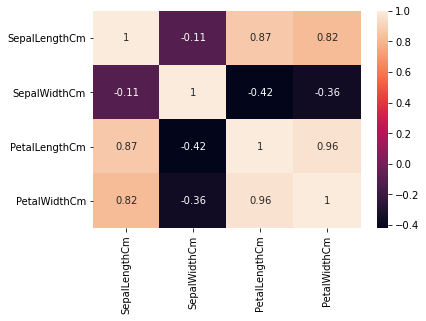

In [42]:
sns.heatmap(df.corr(),annot=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

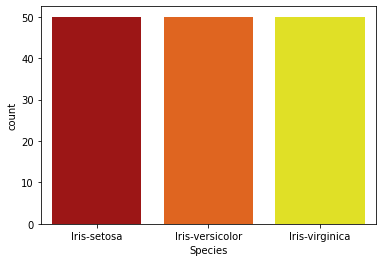

In [43]:
sns.countplot('Species',data=df,palette='hot')

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

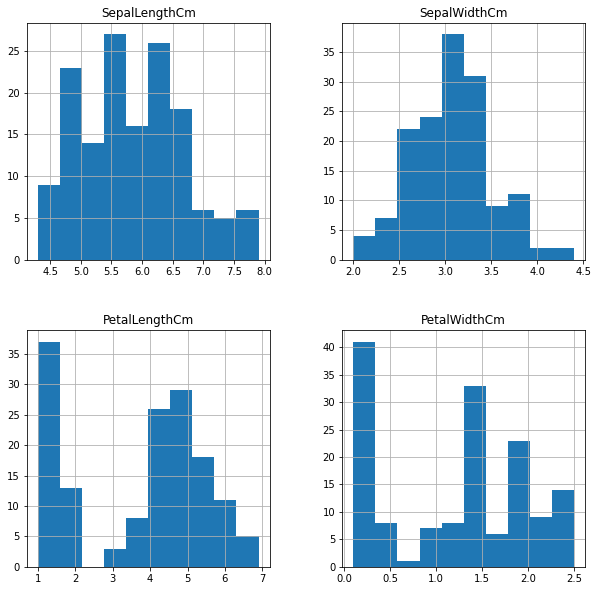

In [44]:
df.hist(figsize=(10,10))

<AxesSubplot:>

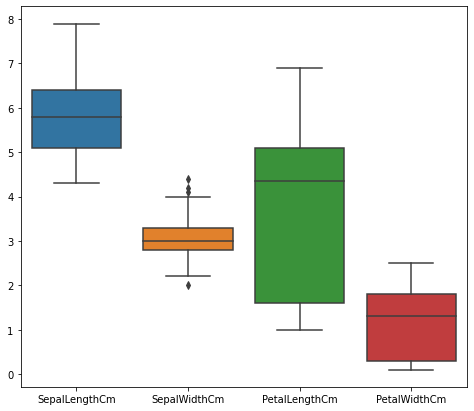

In [96]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=df)

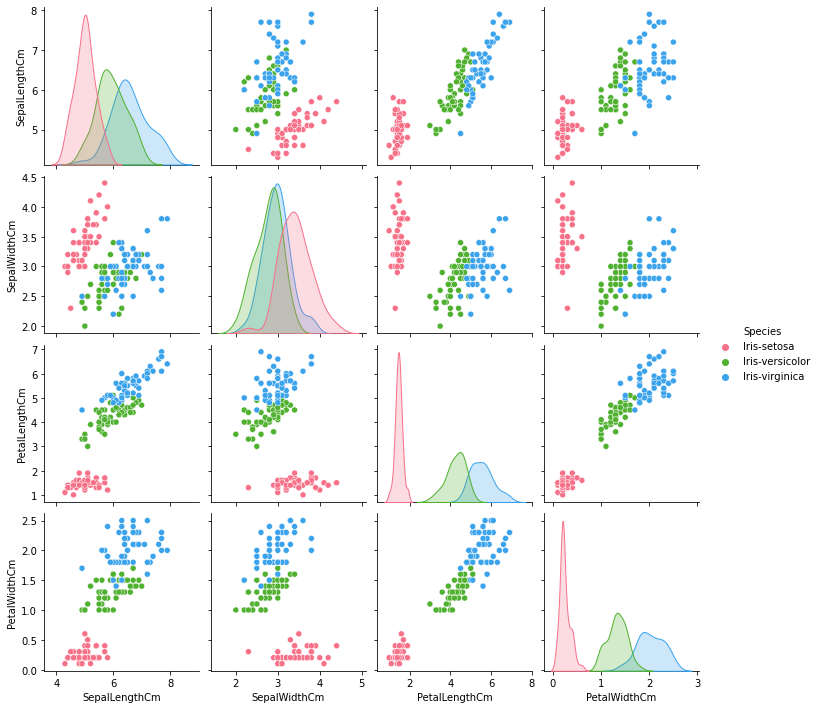

In [49]:
sns.pairplot(df,hue='Species',palette='husl')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

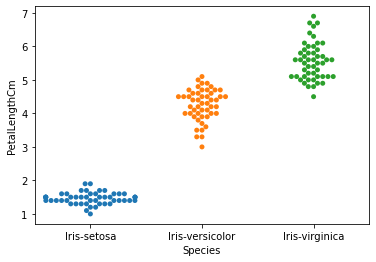

In [54]:
sns.swarmplot(x='Species',y='PetalLengthCm',data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

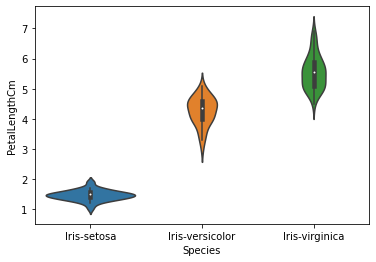

In [56]:
sns.violinplot(x='Species',y='PetalLengthCm',data=df)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

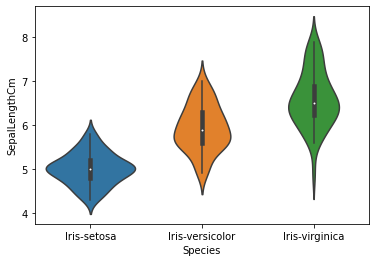

In [57]:
sns.violinplot(x='Species',y='SepalLengthCm',data=df)

In [69]:
x=df.drop('Species',axis=1)

In [70]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [67]:
y=le.fit_transform(df['Species'])

In [68]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [72]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [75]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
model.predict(x_test)

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [82]:
y_pred=model.predict(x_test)

In [83]:
Comparison_table=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
Comparison_table.head(10)

,Actual,Predicted
0,0,0
1,0,0
2,2,2
3,0,0
4,0,0
5,2,1
6,0,0
7,2,2
8,2,2
9,0,0


In [84]:
model.score(x_test,y_test)

0.9333333333333333

In [93]:
from sklearn.metrics import accuracy_score
print('Accuracy Score : ',accuracy_score(y_test, y_pred))

Accuracy Score :  0.9333333333333333


In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  7]], dtype=int64)

Text(33.0, 0.5, 'Truth')

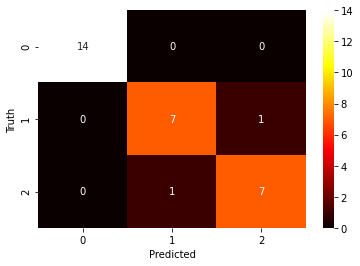

In [88]:
sns.heatmap(cm,annot=True,cmap='hot')
plt.xlabel('Predicted')
plt.ylabel('Truth')

[Text(223.2, 391.392, 'X[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [36, 42, 42]'),
 Text(167.39999999999998, 304.416, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(279.0, 304.416, 'X[3] <= 1.65\ngini = 0.5\nsamples = 84\nvalue = [0, 42, 42]'),
 Text(111.6, 217.44, 'X[2] <= 4.95\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(55.8, 130.464, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(167.39999999999998, 130.464, 'X[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(111.6, 43.488, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(223.2, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.4, 217.44, 'X[2] <= 4.85\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(390.59999999999997, 130.464, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(334.79999999999995, 43.488, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(446.4, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(502.2, 130.4

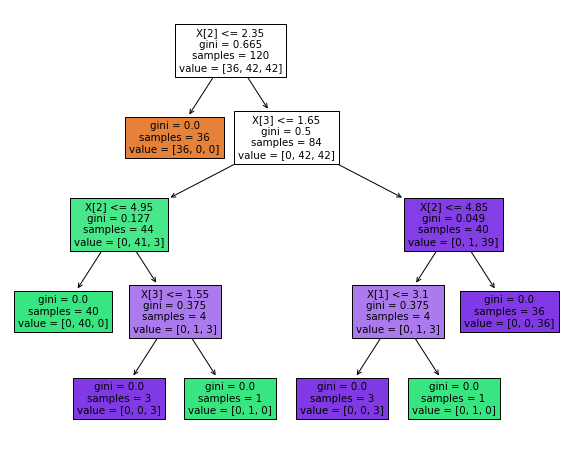

In [91]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(model,filled=True)